#**Conexão com postgres e Relatórios do Sistema**


##**Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos** 

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### **Importando bibliotecas**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### **Usando psycopg2 para configurar conexão**

In [ ]:
conn=psycopg2.connect(host="motty.db.elephantsql.com", database="obzfwmvi", user="obzfwmvi", password="jTtTSw4eBETm8qmJocZRTpKNRE76woKC")

# **Relatórios**

## **Relatório 1**
### **Objetivo: Obter relatório que mostre o nome dos idiomas oferecidos pela Escola, e quantos professores dão aula.**

Código para obtenção do resultado:

In [ ]:
res=pd.read_sql_query("""select idioma_prof as Idioma, count(idioma_prof) as Quantidade from Professor 
group by idioma_prof order by idioma_prof asc;""", conn)
res

,idioma,quantidade
0,espanhol,2
1,francês,2
2,inglês,5


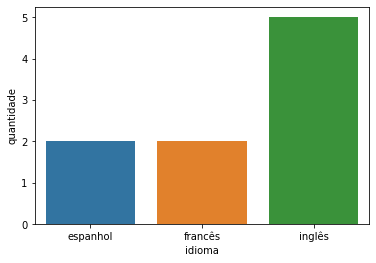

In [ ]:
sns.barplot(x='idioma', y='quantidade', data=res) 

# ============================================================
## **Relatório 2**
### **Objetivo: Obter relatório que mostre o nome dos idiomas oferecidos pela Escola, e quantos alunos fazem as aulas dos idiomas.**

Código para obtenção do resultado:

In [ ]:
res=pd.read_sql_query("""select idioma_aluno as Idioma, count(idioma_aluno) as Quantidade from Aluno 
group by idioma_aluno order by idioma_aluno asc;""", conn)
res

,idioma,quantidade
0,espanhol,7
1,francês,8
2,inglês,14


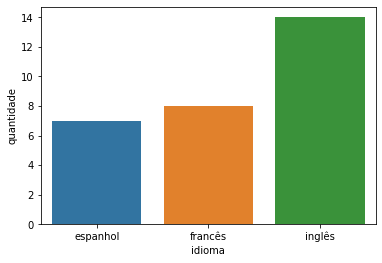

In [ ]:
sns.barplot(x='idioma', y='quantidade', data=res)

# ============================================================
## **Relatório 3**
### **Objetivo: Obter relatório que mostre os nomes dos professores, e quantos alunos cada professor vai dar aula.**

Código para obtenção do resultado:

In [ ]:
res=pd.read_sql_query("""select professor.nome_prof as professor, 
count(agenda.id_aluno) as quantidade_alunos from professor 
inner join agenda on agenda.id_prof = professor.id_prof 
group by professor order by professor asc""", conn)
res

,professor,quantidade_alunos
0,Brenda,7
1,Carla,5
2,Ingrid,6
3,Jorge,5
4,Luiz,6
5,Luna,8
6,Maristela,4
7,Stella,3
8,Vitória,6


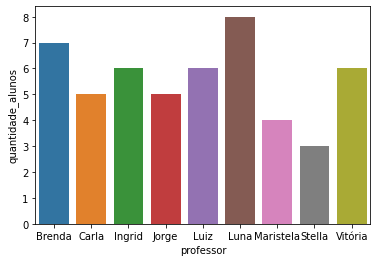

In [ ]:
sns.barplot(x='professor', y='quantidade_alunos', data=res)

# ============================================================
## **Relatório 4**
### **Objetivo: Obter relatório que mostra a quantidade de aulas marcadas por cada Recepcionista.**

Código para obtenção do resultado:

In [14]:
res = pd.read_sql_query("""select recepcionista.nome_recep as Recepcionistas, 
count(agenda.id_recep) as quantidade from agenda 
inner join recepcionista on (recepcionista.id_recep = agenda.id_recep) 
group by Recepcionistas order by Recepcionistas;""",conn)
res

,recepcionistas,quantidade
0,Débora,15
1,Glória,14
2,Larissa,21


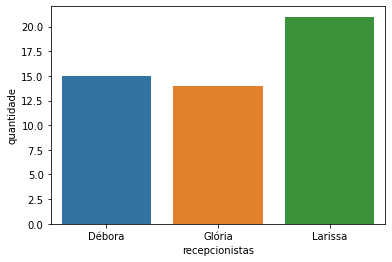

In [ ]:
sns.barplot(x='recepcionistas', y='quantidade', data=res)

# ============================================================
## **Relatório 5**
### **Objetivo: Obter relatório que mostra a quantidade de aulas dada por dia.**

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""select data, count(data) as quantidade_de_aulas_por_dia from agenda 
group by data""",conn)
res

,data,quantidade_de_aulas_por_dia
0,2020-07-30,14
1,2020-08-04,14
2,2020-08-03,15
3,2020-08-05,7


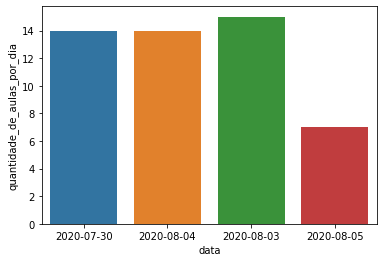

In [ ]:
sns.barplot(x='data', y='quantidade_de_aulas_por_dia', data=res)